<a href="https://colab.research.google.com/github/danielpatrickhug/kernel-trick/blob/main/kernel_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Trick

1/Down the rabbit hole of the kernel trick. Let's start with something simple to help build intuition. 🧵

if you know it already this will most likely not be too interesting, but it's always good to brush up on the basics!

2/ First, we instantiate an "embedding" matrix of vectors of size (m, n) sampled from the normal distribution. For each pair of vectors (i, j), we compute the dot product between the two and store it in the adjacency matrix. Notice the symmetry between points (i, j) and (j, i).

In [ ]:
# Usage
m = 5
n = 3
embedding_matrix = np.random.normal(size=(m, n))

In [30]:
import numpy as np

def kernel_function1(embedding_matrix):
    # Initialize embedding matrix of random vectors sampled from the normal distribution
    # Create an empty matrix for the kernel
    m = embedding_matrix.shape[0]
    kernel_matrix = np.zeros((m, m))

    # Calculate kernel matrix using 2 for loops
    for i in range(m):
        for j in range(m):
            # Here we use dot product as a simple kernel function
            kernel_matrix[i, j] = np.dot(embedding_matrix[i], embedding_matrix[j])
    
    return kernel_matrix

A = kernel_function1(embedding_matrix)
print(A)


[[ 2.45088359  1.33443298 -0.20212026 -0.55920389  0.14594067]
 [ 1.33443298  2.80218324 -1.3660105  -0.7500674   1.11279092]
 [-0.20212026 -1.3660105   0.87636899  0.37914582 -0.73933572]
 [-0.55920389 -0.7500674   0.37914582  0.26355865 -0.32000421]
 [ 0.14594067  1.11279092 -0.73933572 -0.32000421  0.62752336]]


Lets check two things. 
1. The symmetry of pariwise distances between all matching pairs of (i,j) and (j,i) 
2. Confirm the kernel matrix is positive semi definite

In [21]:
def check_symmetry(kernel_matrix):
    # Check if the input matrix is square
    if kernel_matrix.shape[0] != kernel_matrix.shape[1]:
        raise ValueError("The input kernel matrix must be square.")

    # Check if the difference between the matrix and its transpose is close to zero
    is_symmetric = np.allclose(kernel_matrix, kernel_matrix.T, atol=1e-8)

    return is_symmetric

check_symmetry(A)

True

In [22]:
def is_positive_semi_definite(kernel_matrix):
    # Check if the input matrix is square
    if kernel_matrix.shape[0] != kernel_matrix.shape[1]:
        raise ValueError("The input kernel matrix must be square.")
    
    # Compute the eigenvalues of the kernel matrix
    eigenvalues = np.linalg.eigvalsh(kernel_matrix)
    
    # Check if all eigenvalues are non-negative (within a small tolerance)
    is_psd = np.all(eigenvalues >= -1e-8)
    
    return is_psd
is_positive_semi_definite(A)

True

Lets also plot the heat map of the kernel matrix

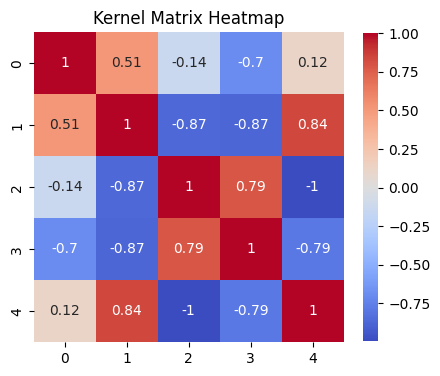

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kernel_matrix_heatmap(kernel_matrix):
    # Check if the input matrix is square
    if kernel_matrix.shape[0] != kernel_matrix.shape[1]:
        raise ValueError("The input kernel matrix must be square.")
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(5, 5))
    sns.heatmap(kernel_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
    plt.title("Kernel Matrix Heatmap")
    plt.show()

plot_kernel_matrix_heatmap(A)

3/ Now, let's calculate the cosine similarity between the vectors, which is a measure of similarity between two non-zero vectors based on the cosine of the angle between them. The cosine similarity ranges from -1 (completely dissimilar) to 1 (completely similar).

In [31]:

def kernel_function2(embedding_matrix):
    # Get the number of vectors in the embedding matrix
    m = embedding_matrix.shape[0]

    # Create an empty matrix for the kernel
    kernel_matrix = np.zeros((m, m))

    # Calculate kernel matrix using 2 for loops
    for i in range(m):
        for j in range(m):
            # Compute cosine similarity
            dot_product = np.dot(embedding_matrix[i], embedding_matrix[j])
            magnitude_i = np.linalg.norm(embedding_matrix[i])
            magnitude_j = np.linalg.norm(embedding_matrix[j])
            cosine_similarity = dot_product / (magnitude_i * magnitude_j)
            
            # Store the cosine similarity in the kernel matrix
            kernel_matrix[i, j] = cosine_similarity
    
    return kernel_matrix

A_2 = kernel_function2(embedding_matrix)
print(A_2)


[[ 1.          0.50919855 -0.13791293 -0.69577722  0.11767929]
 [ 0.50919855  1.         -0.87169042 -0.87279729  0.83917079]
 [-0.13791293 -0.87169042  1.          0.78890397 -0.99697263]
 [-0.69577722 -0.87279729  0.78890397  1.         -0.7868684 ]
 [ 0.11767929  0.83917079 -0.99697263 -0.7868684   1.        ]]


is Symmetric? True
is Positive Semi Definite? True


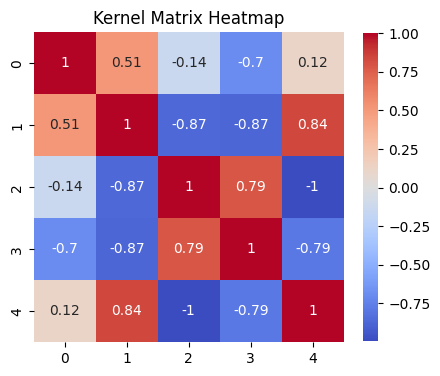

In [34]:
print(f'is Symmetric? {check_symmetry(A_2)}')
print(f'is Positive Semi Definite? {is_positive_semi_definite(A_2)}')
plot_kernel_matrix_heatmap(A_2)

4/ Next, let's explore another kernel function - the Radial Basis Function (RBF) Kernel, also known as the Gaussian kernel. This kernel function measures the similarity between data points in a transformed space.

In [35]:

def kernel_function3(embedding_matrix, gamma =0.1):
    # Get the number of vectors in the embedding matrix
    m = embedding_matrix.shape[0]

    # Create an empty matrix for the kernel
    kernel_matrix = np.zeros((m, m))

    # Calculate kernel matrix using 2 for loops
    for i in range(m):
        for j in range(m):
            # Compute squared Euclidean distance
            squared_distance = np.sum((embedding_matrix[i] - embedding_matrix[j]) ** 2)
            
            # Compute RBF kernel
            kernel_matrix[i, j] = np.exp(-gamma * squared_distance)
    
    return kernel_matrix
    
A_3 =kernel_function3(embedding_matrix)
print(A_3)


[[1.         0.77227074 0.68856242 0.68161861 0.7568028 ]
 [0.77227074 1.         0.5267352  0.63344147 0.88655468]
 [0.68856242 0.5267352  1.         0.96255545 0.74211105]
 [0.68161861 0.63344147 0.96255545 1.         0.85803615]
 [0.7568028  0.88655468 0.74211105 0.85803615 1.        ]]


is Symmetric? True
is Positive Semi Definite? True


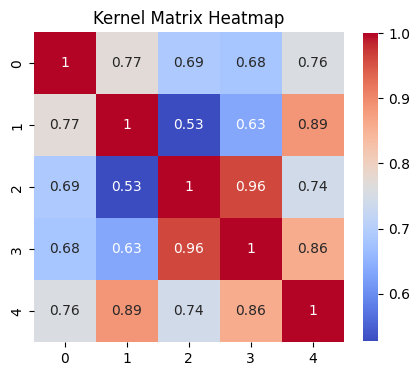

In [36]:
print(f'is Symmetric? {check_symmetry(A_3)}')
print(f'is Positive Semi Definite? {is_positive_semi_definite(A_3)}')
plot_kernel_matrix_heatmap(A_3)

5a/ 💡 The "kernel trick" is a powerful technique in kernel methods that enables them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space. 

5b/ Instead, kernel functions are used to compute the inner products (dot products) between the transformed representations of all pairs of data points in the feature space, which is often more computationally efficient than the explicit computation of the coordinates. 


5c/ This approach allows kernel methods to work with various types of data, such as sequence data, graphs, text, images, and vectors. Let's see how this works in practice for the linear kernel, cosine kernel, and Gaussian RBF kernel.

6/ let's speed things up with the kernel trick applied to the linear kernel. We're replacing the for loops with a matrix multiplication operation. Notice how you get the same adjacency matrix as with the first kernel function. 

This is also known as the Gram matrix.

In [7]:

def linear_kernel_function(embedding_matrix):
    # Compute the kernel matrix using matrix multiplication. AAT
    kernel_matrix = np.matmul(embedding_matrix, embedding_matrix.T)
    return kernel_matrix

print(linear_kernel_function(embedding_matrix))


[[ 2.45088359  1.33443298 -0.20212026 -0.55920389  0.14594067]
 [ 1.33443298  2.80218324 -1.3660105  -0.7500674   1.11279092]
 [-0.20212026 -1.3660105   0.87636899  0.37914582 -0.73933572]
 [-0.55920389 -0.7500674   0.37914582  0.26355865 -0.32000421]
 [ 0.14594067  1.11279092 -0.73933572 -0.32000421  0.62752336]]


In [ ]:
"""
from the first computation.
[[ 2.45088359  1.33443298 -0.20212026 -0.55920389  0.14594067]
 [ 1.33443298  2.80218324 -1.3660105  -0.7500674   1.11279092]
 [-0.20212026 -1.3660105   0.87636899  0.37914582 -0.73933572]
 [-0.55920389 -0.7500674   0.37914582  0.26355865 -0.32000421]
 [ 0.14594067  1.11279092 -0.73933572 -0.32000421  0.62752336]]
"""

7a/ 📐 Cosine similarity is a metric that measures the similarity between two vectors in an inner product space. It calculates the cosine of the angle between the two vectors, which ranges from -1 (completely dissimilar) to 1 (completely similar), with 0 indicating orthogonality

In [20]:

def cosine_kernel_function(embedding_matrix):
    # Normalize each row (vector) in the matrix
    normed_matrix = embedding_matrix / np.linalg.norm(embedding_matrix, axis=1, keepdims=True)
    
    # Compute the kernel matrix using matrix multiplication
    kernel_matrix = np.matmul(normed_matrix, normed_matrix.T)
    
    return kernel_matrix

print(cosine_kernel_function(embedding_matrix))

[[ 1.          0.50919855 -0.13791293 -0.69577722  0.11767929]
 [ 0.50919855  1.         -0.87169042 -0.87279729  0.83917079]
 [-0.13791293 -0.87169042  1.          0.78890397 -0.99697263]
 [-0.69577722 -0.87279729  0.78890397  1.         -0.7868684 ]
 [ 0.11767929  0.83917079 -0.99697263 -0.7868684   1.        ]]


7b/ This makes cosine similarity well-suited for applications where the direction of the vectors is more important than their magnitudes, such as text analysis, document clustering, and collaborative filtering.

8/ And finally, let's apply the kernel trick to the Gaussian RBF kernel. Once again, we get the same adjacency matrix as with the original kernel function. Voila! 🎉

In [17]:

def rbf_kernel_function(embedding_matrix, gamma):
    # Compute squared Euclidean distance matrix
    squared_norms = np.sum(embedding_matrix**2, axis=1)
    squared_distances = -2 * np.dot(embedding_matrix, embedding_matrix.T) + squared_norms[:, np.newaxis] + squared_norms[np.newaxis, :]

    # Compute RBF kernel matrix
    kernel_matrix = np.exp(-gamma * squared_distances)

    return kernel_matrix

gamma = 0.1
print(rbf_kernel_function(embedding_matrix, gamma))


[[1.         0.77227074 0.68856242 0.68161861 0.7568028 ]
 [0.77227074 1.         0.5267352  0.63344147 0.88655468]
 [0.68856242 0.5267352  1.         0.96255545 0.74211105]
 [0.68161861 0.63344147 0.96255545 1.         0.85803615]
 [0.7568028  0.88655468 0.74211105 0.85803615 1.        ]]


9/  In conclusion, the kernel trick is a powerful technique that enables us to efficiently compute kernel functions without explicitly transforming the data points. This thread introduced the basic concept for three different kernels. 


10(bonus)/  Algorithms capable of operating with kernels include the kernel perceptron, support-vector machines (SVM), Gaussian processes, principal components analysis (PCA), canonical correlation analysis, ridge regression, and spectral clustering. 
And here is the Wikipedia page on the kernel method
https://en.wikipedia.org/wiki/Kernel_method
Now that we have kernels out of the way next time we can start looking at more complicated algorithms like graph laplacian, SVM, and Kernel ridge regression. 


Kernel machines are slow to compute for datasets larger than a couple of thousand examples without parallel processing. So its good to first partition your data into sub spaces

